In [1]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np # for linear algebra
import pandas as pd # data processing, excel file importation

import matplotlib.pyplot as plt
from statsmodels.graphics.correlation import plot_corr
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_excel('DataSet.xlsx')

In [3]:
pd.set_option("display.max.columns", None)

In [4]:
df.head()

,PolicyId,ClaimId,SumTotalClaimAmount,CountTotalClaimAmount,PremiumSum,CasePremiumSum,PaymentDueDate,TotalPremiumPaymentCount,PreviousInsurerExcess,PreviousInsurerPremium,EmploymentType,IsMemberPayer,Employer,Occupation,IndustryType,Gender,BirthDt,MaritalStatus,Make,Model,Colour,Transmission,VehicleType,BodyType,CubicCapacity,Cyl,Kilowatts,VehicleYear,PolicyMainDriverAnnualMileage,PolicyMainDriverLicenseDurationRange,PersonProvince,Area,MonthsSinceInception,DaysSinceInception,PolicyStatus,CommencementDt,PolicyEndDate,SumAssured,MeanExcess,TotalExcess,ExcessTypesCount,BaseExcess,NomimatedDriversCount,NomimatedDriversUnder30Count,0.5865768182345752
0,10806273,NaN,NaN,NaN,4915.98,4369.76,2021-12-29,8.0,0.0,0.0,Permanent,1,NaN,Human Resource Consultant,Office / Clerical / Manager,Female,1966-11-22,Single,VOLKSWAGEN,POLO 1.4,grey,M,Auto,H/B,1390.0,4.0,62.0,2005.0,<5000 km,15+ years,KWAZULU-NATAL,Dolphin Coast,23.0,723.0,Cancelled,2020-01-06,2021-12-29 14:46:25.4847000,45700.0,3166.666666,19000.0,6.0,1000.0,2.0,1.0,0.376611
1,10822247,NaN,NaN,NaN,3342.60,668.52,2020-09-30,1.0,4500.0,900.0,Permanent,1,NaN,Sale Rep,Government,Male,1992-08-31,Single,VOLKSWAGEN,POLO VIVO GP 1.4 CONCEPTLINE 5DR,silver,M,Auto,H/B,1398.0,4.0,55.0,2015.0,15000+ km,6 to 11 years,GAUTENG,PRETORIA,5.0,151.0,Lapsed,2020-05-18,2020-10-16 00:00:44.0122000,113100.0,4500.000000,9000.0,2.0,5000.0,1.0,1.0,0.788738
2,10941976,NaN,NaN,NaN,1762.54,1762.54,2022-07-28,3.0,0.0,808.0,Permanent,1,NaN,Safety Officer,Office / Clerical / Manager,Female,1989-08-14,Single,VOLKSWAGEN,POLO VIVO 1.4 5Dr,white,M,Auto,H/B,1398.0,4.0,55.0,2014.0,5000 to 9999 km,6 to 11 years,MPUMALANGA,PRETORIA,NaN,NaN,Active,2022-05-30,NaN,92900.0,3333.333333,20000.0,6.0,1000.0,0.0,0.0,0.375597
3,10782539,NaN,NaN,NaN,3723.60,3723.60,2021-08-31,5.0,0.0,0.0,Temporary / Casual,1,NaN,Cic support engineer,Other,Female,1991-02-17,Single,KIA,RIO 1.2 5DR,white,M,Auto,H/B,1248.0,4.0,62.0,2017.0,15000+ km,1 to 6 years,GAUTENG,NOORDWYK,26.0,800.0,Cancelled,2019-07-18,2021-09-25 14:09:25.7650000,173800.0,5720.000000,34320.0,6.0,5000.0,1.0,0.0,0.773472
4,10916477,NaN,NaN,NaN,2478.72,0.00,2022-03-31,0.0,0.0,0.0,Permanent,1,NaN,Correctional Officer,Government,Male,1976-01-23,Single,BMW,320i M SPORT (F30),blue,M,Auto,S/D,1998.0,4.0,135.0,2015.0,<5000 km,15+ years,EASTERN CAPE,NaN,3.0,96.0,Lapsed,2022-01-10,2022-04-16 00:02:41.8644000,240200.0,6286.666666,37720.0,6.0,5000.0,0.0,0.0,0.278507


In [5]:
df.columns

Index([                            'PolicyId',
                                   'ClaimId ',
                        'SumTotalClaimAmount',
                      'CountTotalClaimAmount',
                                 'PremiumSum',
                             'CasePremiumSum',
                             'PaymentDueDate',
                   'TotalPremiumPaymentCount',
                      'PreviousInsurerExcess',
                     'PreviousInsurerPremium',
                             'EmploymentType',
                              'IsMemberPayer',
                                   'Employer',
                                 'Occupation',
                               'IndustryType',
                                     'Gender',
                                    'BirthDt',
                              'MaritalStatus',
                                       'Make',
                                      'Model',
                                     'Colour',
             

In [6]:
df.shape

(262990, 45)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262990 entries, 0 to 262989
Data columns (total 45 columns):
 #   Column                                Non-Null Count   Dtype         
---  ------                                --------------   -----         
 0   PolicyId                              262990 non-null  int64         
 1   ClaimId                               27478 non-null   float64       
 2   SumTotalClaimAmount                   27392 non-null   float64       
 3   CountTotalClaimAmount                 27478 non-null   float64       
 4   PremiumSum                            262750 non-null  float64       
 5   CasePremiumSum                        262750 non-null  float64       
 6   PaymentDueDate                        262750 non-null  datetime64[ns]
 7   TotalPremiumPaymentCount              262750 non-null  float64       
 8   PreviousInsurerExcess                 262963 non-null  float64       
 9   PreviousInsurerPremium                262961 non-null  floa

In [8]:
df.isnull().sum()

PolicyId                                     0
ClaimId                                 235512
SumTotalClaimAmount                     235598
CountTotalClaimAmount                   235512
PremiumSum                                 240
CasePremiumSum                             240
PaymentDueDate                             240
TotalPremiumPaymentCount                   240
PreviousInsurerExcess                       27
PreviousInsurerPremium                      29
EmploymentType                            2656
IsMemberPayer                                0
Employer                                255704
Occupation                                2246
IndustryType                              4131
Gender                                       8
BirthDt                                      6
MaritalStatus                                6
Make                                         6
Model                                        6
Colour                                       6
Transmission 

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PolicyId,262990.0,1.084961e+07,51720.661654,1.076784e+07,1.080422e+07,1.084769e+07,1.089272e+07,1.095790e+07
ClaimId,27478.0,1.010507e+07,15069.963591,1.007378e+07,1.009240e+07,1.010566e+07,1.011831e+07,1.012987e+07
SumTotalClaimAmount,27392.0,4.059307e+04,65213.503869,0.000000e+00,3.415500e+03,1.391817e+04,4.461965e+04,1.754000e+06
CountTotalClaimAmount,27478.0,1.256787e+00,0.574605,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,9.000000e+00
PremiumSum,262750.0,4.589583e+03,3538.634556,0.000000e+00,1.988050e+03,3.568235e+03,6.351193e+03,4.182255e+04
CasePremiumSum,262750.0,3.709207e+03,3718.507791,0.000000e+00,7.191375e+02,2.743360e+03,5.620938e+03,4.182255e+04
TotalPremiumPaymentCount,262750.0,4.623604e+00,4.066673,0.000000e+00,1.000000e+00,4.000000e+00,7.000000e+00,1.400000e+01
PreviousInsurerExcess,262963.0,2.923134e+03,6031.299346,-1.000000e+00,0.000000e+00,0.000000e+00,5.000000e+03,8.000000e+05
PreviousInsurerPremium,262961.0,5.767832e+02,654.862704,-1.700000e+03,0.000000e+00,4.580000e+02,1.070000e+03,2.300000e+04
IsMemberPayer,262990.0,9.662154e-01,0.180675,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [10]:
df.corr()

,PolicyId,ClaimId,SumTotalClaimAmount,CountTotalClaimAmount,PremiumSum,CasePremiumSum,TotalPremiumPaymentCount,PreviousInsurerExcess,PreviousInsurerPremium,IsMemberPayer,CubicCapacity,Cyl,Kilowatts,VehicleYear,MonthsSinceInception,DaysSinceInception,SumAssured,MeanExcess,TotalExcess,ExcessTypesCount,BaseExcess,NomimatedDriversCount,NomimatedDriversUnder30Count,0.5865768182345752
PolicyId,1.000000,0.674319,0.033234,-0.051384,-0.320445,-0.265335,-0.339870,-0.014394,-0.045854,-0.024764,-0.021576,-0.046390,-0.008094,0.169925,-0.450538,-0.453100,0.065627,0.105844,0.396211,0.498567,0.134392,-0.187614,-0.106212,-0.000908
ClaimId,0.674319,1.000000,-0.005912,0.027355,-0.122185,-0.075426,-0.155565,-0.015826,-0.042123,-0.025404,0.002193,-0.019562,-0.001576,0.096609,-0.016954,-0.021405,0.038429,0.055201,0.413176,0.611641,0.093471,-0.082379,-0.066292,0.006330
SumTotalClaimAmount,0.033234,-0.005912,1.000000,0.257181,-0.152296,-0.165338,-0.269677,0.036814,0.046033,0.001859,-0.003578,-0.020906,0.017041,0.134653,-0.231691,-0.232308,0.126341,0.106573,-0.055318,-0.216238,0.089932,-0.044302,-0.006269,0.002106
CountTotalClaimAmount,-0.051384,0.027355,0.257181,1.000000,0.122545,0.122236,0.084695,0.012873,0.046366,0.006947,-0.000259,-0.001533,0.022238,0.007784,0.071021,0.072212,0.033874,0.031689,0.021151,0.000827,-0.051575,0.013327,0.022365,-0.007581
PremiumSum,-0.320445,-0.122185,-0.152296,0.122545,1.000000,0.929425,0.779827,0.066375,0.157109,0.009417,0.029850,-0.024453,0.110891,0.198741,0.533948,0.534514,0.326275,0.303627,0.346171,0.177192,0.034578,0.100676,0.073290,-0.001310
CasePremiumSum,-0.265335,-0.075426,-0.165338,0.122236,0.929425,1.000000,0.883102,0.045597,0.107036,-0.000763,0.017296,-0.025852,0.082787,0.160686,0.610786,0.612088,0.252367,0.259096,0.387786,0.293609,0.014279,0.117991,0.077908,-0.002064
TotalPremiumPaymentCount,-0.339870,-0.155565,-0.269677,0.084695,0.779827,0.883102,1.000000,-0.004766,-0.006639,-0.012016,-0.001139,0.002072,-0.000577,-0.042105,0.675016,0.676747,-0.016324,0.009930,0.193603,0.293913,-0.069833,0.145511,0.078316,-0.001982
PreviousInsurerExcess,-0.014394,-0.015826,0.036814,0.012873,0.066375,0.045597,-0.004766,1.000000,0.442726,0.026939,-0.062386,-0.054648,-0.025591,0.147769,0.011308,0.011492,0.117590,0.120901,0.081235,-0.013035,0.083602,-0.041376,-0.010484,0.000920
PreviousInsurerPremium,-0.045854,-0.042123,0.046033,0.046366,0.157109,0.107036,-0.006639,0.442726,1.000000,0.045403,-0.054820,-0.062145,0.020394,0.241129,0.017792,0.018161,0.279245,0.169071,0.114564,-0.036698,0.002855,-0.039142,-0.016626,-0.001931
IsMemberPayer,-0.024764,-0.025404,0.001859,0.006947,0.009417,-0.000763,-0.012016,0.026939,0.045403,1.000000,-0.015671,-0.007861,-0.008351,0.017148,-0.006163,-0.006256,0.014238,0.016676,-0.004235,-0.027872,0.002051,-0.077356,-0.052299,0.000817


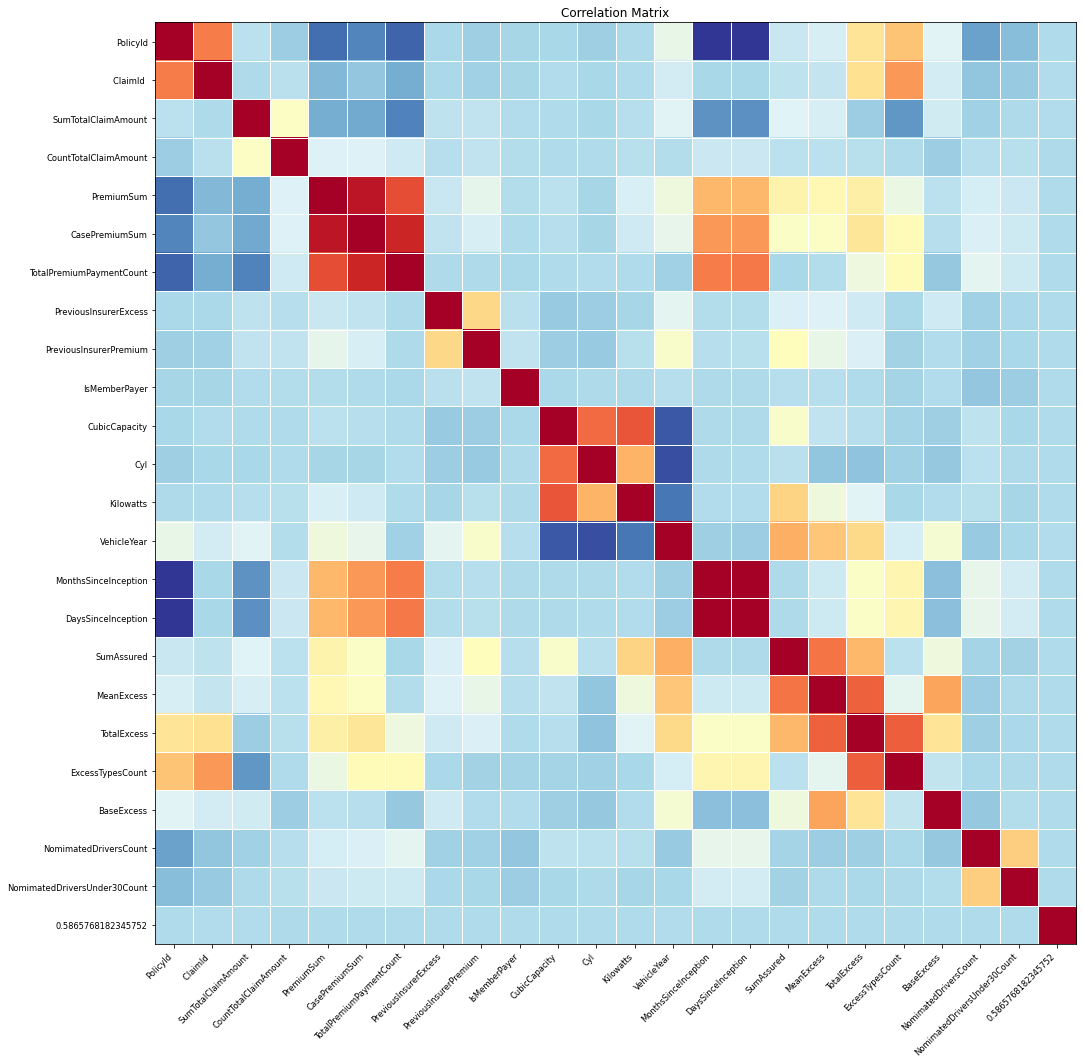

In [11]:
fig = plt.figure(figsize=(15,15));
ax = fig.add_subplot(111);
plot_corr(df.corr(), xnames = df.corr().columns, ax = ax);

In [12]:
df['sum_freq_by_count']= df['SumTotalClaimAmount'] * df['CountTotalClaimAmount']
mean_of_df=df['sum_freq_by_count'].sum()/df['CountTotalClaimAmount'].sum()
df['variance']= df['sum_freq_by_count']-mean_of_df
df['variance*2']= df['variance']*2

data_dict= {
    "No_of_policy": df.shape[0]- df['PolicyId'].isna().sum(),
    "Claim ID Count": df.shape[0]- df['ClaimId '].isna().sum(),
    "Ratio of Claims to Every Policy Holder": f"{df.shape[0]- df['ClaimId '].isna().sum()} : {(df.shape[0]- df['PolicyId'].isna().sum())}",
    "Average Claim Amount": round((df['sum_freq_by_count'].sum()/df['CountTotalClaimAmount'].sum()),2),
    "Average Count of Claim Amount": round((df['CountTotalClaimAmount'].mean()),2),
    "Standard Deviation of Claim Amount": round(((df['variance*2'].sum()/df['CountTotalClaimAmount'].sum())*0.5),2),
}

# Removed from the ratio discussion
# -(df.shape[0]- df['ClaimId '].isna().sum())



In [13]:
data_dict

{'No_of_policy': 262990,
 'Claim ID Count': 27478,
 'Ratio of Claims to Every Policy Holder': '27478 : 262990',
 'Average Claim Amount': 48191.09,
 'Average Count of Claim Amount': 1.26,
 'Standard Deviation of Claim Amount': 9966.43}

In [14]:
df_summary = pd.DataFrame(data_dict, index = [i for i in range(1)])

In [15]:
df_summary.T

,0
No_of_policy,262990
Claim ID Count,27478
Ratio of Claims to Every Policy Holder,27478 : 262990
Average Claim Amount,48191.09
Average Count of Claim Amount,1.26
Standard Deviation of Claim Amount,9966.43


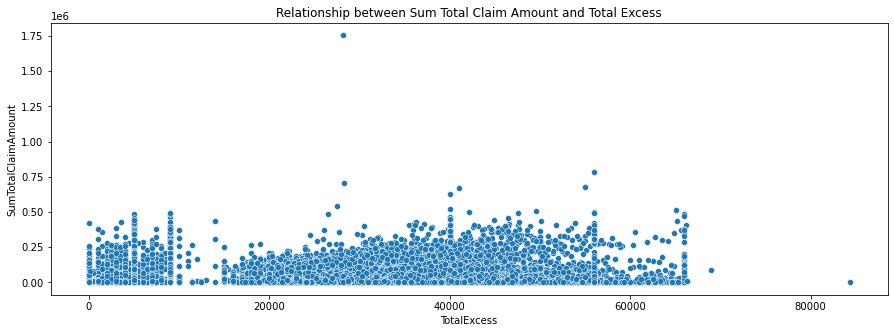

In [16]:
plt.figure(figsize=(15,5))
sns.scatterplot(x="TotalExcess", y="SumTotalClaimAmount", data=df)
plt.title('Relationship between Sum Total Claim Amount and Total Excess')
plt.show()

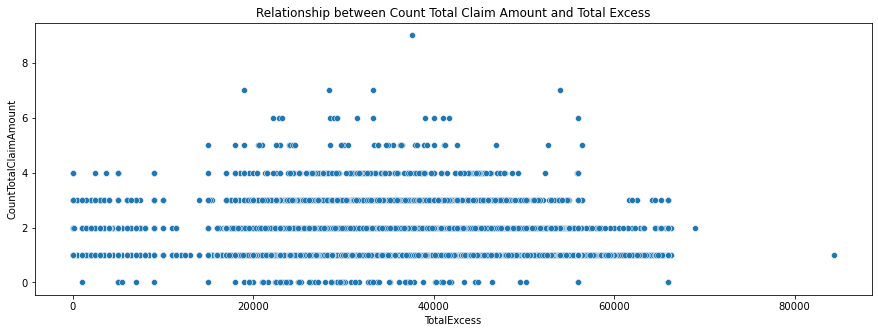

In [17]:
plt.figure(figsize=(15,5))
sns.scatterplot(x="TotalExcess", y="CountTotalClaimAmount", data=df)
plt.title('Relationship between Count Total Claim Amount and Total Excess')
plt.show()

In [18]:
df['BirthDt']

0        1966-11-22
1        1992-08-31
2        1989-08-14
3        1991-02-17
4        1976-01-23
            ...    
262985   1982-04-20
262986   1984-12-16
262987   1971-03-05
262988   1962-12-29
262989   1988-10-04
Name: BirthDt, Length: 262990, dtype: datetime64[ns]

In [19]:
# create new features from the time column

# year
df['BirthYear'] = df['BirthDt'].dt.year
# month
df['BirthMonth'] = df['BirthDt'].dt.month
# day
df['BirthDay'] = df['BirthDt'].dt.day

df.head()


,PolicyId,ClaimId,SumTotalClaimAmount,CountTotalClaimAmount,PremiumSum,CasePremiumSum,PaymentDueDate,TotalPremiumPaymentCount,PreviousInsurerExcess,PreviousInsurerPremium,EmploymentType,IsMemberPayer,Employer,Occupation,IndustryType,Gender,BirthDt,MaritalStatus,Make,Model,Colour,Transmission,VehicleType,BodyType,CubicCapacity,Cyl,Kilowatts,VehicleYear,PolicyMainDriverAnnualMileage,PolicyMainDriverLicenseDurationRange,PersonProvince,Area,MonthsSinceInception,DaysSinceInception,PolicyStatus,CommencementDt,PolicyEndDate,SumAssured,MeanExcess,TotalExcess,ExcessTypesCount,BaseExcess,NomimatedDriversCount,NomimatedDriversUnder30Count,0.5865768182345752,sum_freq_by_count,variance,variance*2,BirthYear,BirthMonth,BirthDay
0,10806273,NaN,NaN,NaN,4915.98,4369.76,2021-12-29,8.0,0.0,0.0,Permanent,1,NaN,Human Resource Consultant,Office / Clerical / Manager,Female,1966-11-22,Single,VOLKSWAGEN,POLO 1.4,grey,M,Auto,H/B,1390.0,4.0,62.0,2005.0,<5000 km,15+ years,KWAZULU-NATAL,Dolphin Coast,23.0,723.0,Cancelled,2020-01-06,2021-12-29 14:46:25.4847000,45700.0,3166.666666,19000.0,6.0,1000.0,2.0,1.0,0.376611,NaN,NaN,NaN,1966.0,11.0,22.0
1,10822247,NaN,NaN,NaN,3342.60,668.52,2020-09-30,1.0,4500.0,900.0,Permanent,1,NaN,Sale Rep,Government,Male,1992-08-31,Single,VOLKSWAGEN,POLO VIVO GP 1.4 CONCEPTLINE 5DR,silver,M,Auto,H/B,1398.0,4.0,55.0,2015.0,15000+ km,6 to 11 years,GAUTENG,PRETORIA,5.0,151.0,Lapsed,2020-05-18,2020-10-16 00:00:44.0122000,113100.0,4500.000000,9000.0,2.0,5000.0,1.0,1.0,0.788738,NaN,NaN,NaN,1992.0,8.0,31.0
2,10941976,NaN,NaN,NaN,1762.54,1762.54,2022-07-28,3.0,0.0,808.0,Permanent,1,NaN,Safety Officer,Office / Clerical / Manager,Female,1989-08-14,Single,VOLKSWAGEN,POLO VIVO 1.4 5Dr,white,M,Auto,H/B,1398.0,4.0,55.0,2014.0,5000 to 9999 km,6 to 11 years,MPUMALANGA,PRETORIA,NaN,NaN,Active,2022-05-30,NaN,92900.0,3333.333333,20000.0,6.0,1000.0,0.0,0.0,0.375597,NaN,NaN,NaN,1989.0,8.0,14.0
3,10782539,NaN,NaN,NaN,3723.60,3723.60,2021-08-31,5.0,0.0,0.0,Temporary / Casual,1,NaN,Cic support engineer,Other,Female,1991-02-17,Single,KIA,RIO 1.2 5DR,white,M,Auto,H/B,1248.0,4.0,62.0,2017.0,15000+ km,1 to 6 years,GAUTENG,NOORDWYK,26.0,800.0,Cancelled,2019-07-18,2021-09-25 14:09:25.7650000,173800.0,5720.000000,34320.0,6.0,5000.0,1.0,0.0,0.773472,NaN,NaN,NaN,1991.0,2.0,17.0
4,10916477,NaN,NaN,NaN,2478.72,0.00,2022-03-31,0.0,0.0,0.0,Permanent,1,NaN,Correctional Officer,Government,Male,1976-01-23,Single,BMW,320i M SPORT (F30),blue,M,Auto,S/D,1998.0,4.0,135.0,2015.0,<5000 km,15+ years,EASTERN CAPE,NaN,3.0,96.0,Lapsed,2022-01-10,2022-04-16 00:02:41.8644000,240200.0,6286.666666,37720.0,6.0,5000.0,0.0,0.0,0.278507,NaN,NaN,NaN,1976.0,1.0,23.0


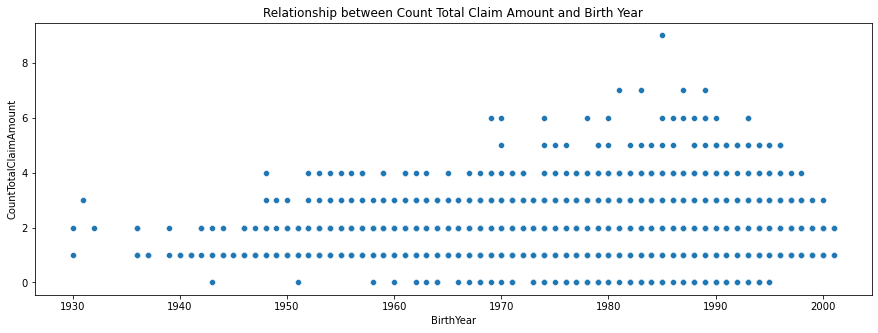

In [20]:
plt.figure(figsize=(15,5))
sns.scatterplot(x="BirthYear", y="CountTotalClaimAmount", data=df)
plt.title('Relationship between Count Total Claim Amount and Birth Year')
plt.show()

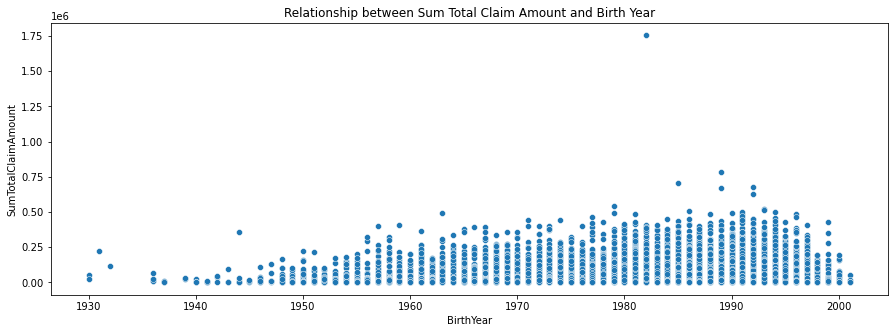

In [21]:
plt.figure(figsize=(15,5))
sns.scatterplot(x="BirthYear", y="SumTotalClaimAmount", data=df)
plt.title('Relationship between Sum Total Claim Amount and Birth Year')
plt.show()

In [22]:
# plt.figure(figsize=(15,5))
# sns.scatterplot(x="PolicyMainDriverAnnualMileage", y="SumTotalClaimAmount", data=df)
# plt.title('Relationship between Count Total Claim Amount and Birth Year')
# plt.show()

In [23]:
df["Gender"].value_counts()

Male      171682
Female     91300
Name: Gender, dtype: int64

([<matplotlib.patches.Wedge at 0x1fb58a78c10>,
 [Text(-0.5080773468610468, 0.9756318002231373, 'Male'),
  Text(0.5080774382062859, -0.9756317526534989, 'Female')],
 [Text(-0.27713309828784366, 0.5321628001217112, '65.28%'),
  Text(0.2771331481125196, -0.5321627741746356, '34.72%')])

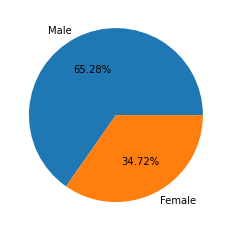

In [24]:
Genders =  df.Gender.value_counts().index
Gender_count = df.Gender.value_counts().values

plt.pie(Gender_count, labels=Genders, autopct="%1.2f%%")

In [25]:
df["EmploymentType"].value_counts()

Permanent             220552
Self-Employed          18943
Temporary / Casual      6889
Retired                 5770
Unemployed              4286
Part-time               3705
Commission Earner        189
Name: EmploymentType, dtype: int64

In [26]:
df["Employer"].value_counts()

Self Employed                                             1531
DOE                                                       1381
DOH                                                        795
Unemployed                                                 622
Retired                                                    525
SAPS                                                       436
Pensioner                                                  226
SA National Defence Force                                  166
Department of Social Development                           113
ABSA                                                        96
Eskom                                                       92
Sasol                                                       89
Transnet                                                    87
Standard Bank                                               85
Anglo American                                              79
Sanlam                                                 

In [27]:
df["Occupation"].value_counts()

Educator                   10188
Self Employed               5840
Teacher                     4466
Nurse                       4127
Driver                      4037
                           ...  
MULTI-SKILLED OPERATOR         1
Assistant Planner              1
MANAGING DIRECTOR              1
Head Team Leader               1
Service Champion               1
Name: Occupation, Length: 27981, dtype: int64

In [28]:
df["IndustryType"].value_counts()

Other                                 124116
Government                             48685
Professional                           28914
Government Education                   20973
Office / Clerical / Manager            14566
Mining                                 11616
Medical                                 6907
Construction                            2751
Charity                                  197
Trade (e.g Electrician or Plumber)       134
Name: IndustryType, dtype: int64

In [29]:
df["MaritalStatus"].value_counts()

Single      133594
Married     113017
Divorced     11076
Widowed       5297
Name: MaritalStatus, dtype: int64

In [30]:
df["Make"].value_counts()

VOLKSWAGEN    69516
TOYOTA        30850
HYUNDAI       25149
RENAULT       20927
FORD          19376
              ...  
JINBEI            1
DFM               1
ROVER             1
ZX AUTO           1
MEIYA             1
Name: Make, Length: 68, dtype: int64

In [31]:
df["PersonProvince"].value_counts()

GAUTENG          107988
KWAZULU-NATAL     47491
MPUMALANGA        20007
EASTERN CAPE      19227
LIMPOPO           19193
WESTERN CAPE      17302
NORTH WEST        15914
FREE STATE        10547
NORTHERN CAPE      5315
Name: PersonProvince, dtype: int64

In [32]:
df["PolicyStatus"].value_counts()

Active       113661
Cancelled     71636
Lapsed        63158
Pending       14529
Name: PolicyStatus, dtype: int64

In [33]:
df["PolicyMainDriverAnnualMileage"].value_counts()

15000+ km            195509
10000 to 14999 km     26723
5000 to 9999 km       20944
<5000 km              19808
Name: PolicyMainDriverAnnualMileage, dtype: int64

## Visualizing the attributes

<Figure size 1080x360 with 0 Axes>

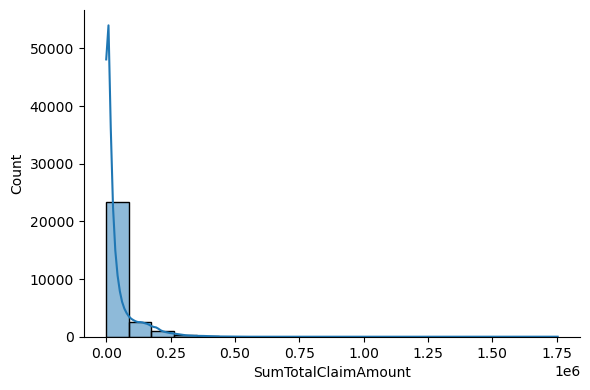

In [34]:
plt.figure(figsize=(15,5))
sns.displot(df["SumTotalClaimAmount"], bins = 20, kde = True, height=4, aspect=1.5).fig.set_dpi(100);

<Figure size 1080x360 with 0 Axes>

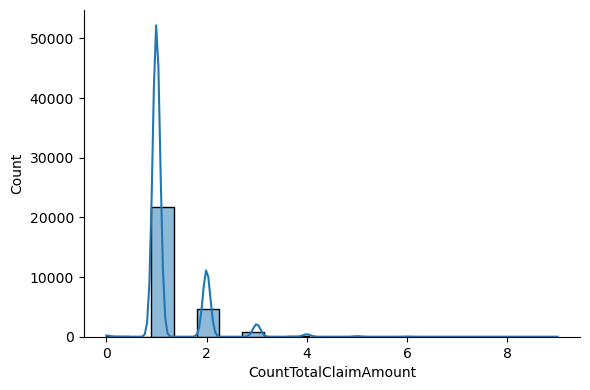

In [35]:
plt.figure(figsize=(15,5))
sns.displot(df["CountTotalClaimAmount"], bins = 20, kde = True, height=4, aspect=1.5).fig.set_dpi(100);

<Figure size 1080x360 with 0 Axes>

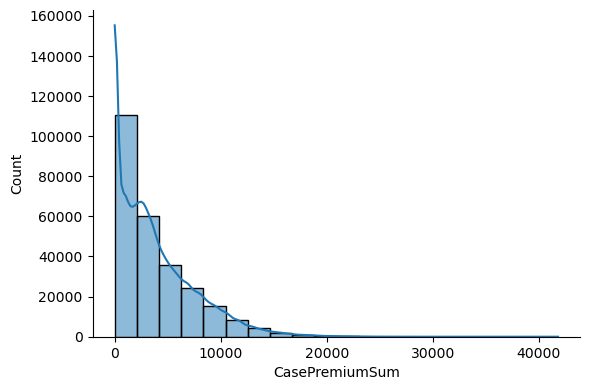

In [36]:
plt.figure(figsize=(15,5))
sns.displot(df["CasePremiumSum"], bins = 20, kde = True, height=4, aspect=1.5).fig.set_dpi(100);

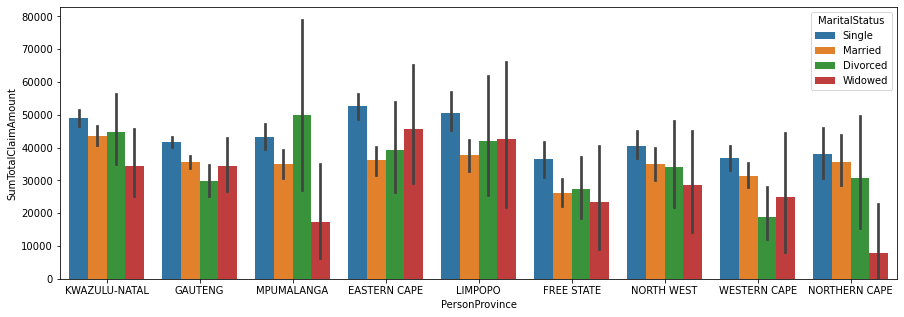

In [37]:
plt.figure(figsize=(15,5))
sns.barplot(x = "PersonProvince", y = "SumTotalClaimAmount", hue = "MaritalStatus", data = df);
plt.show();

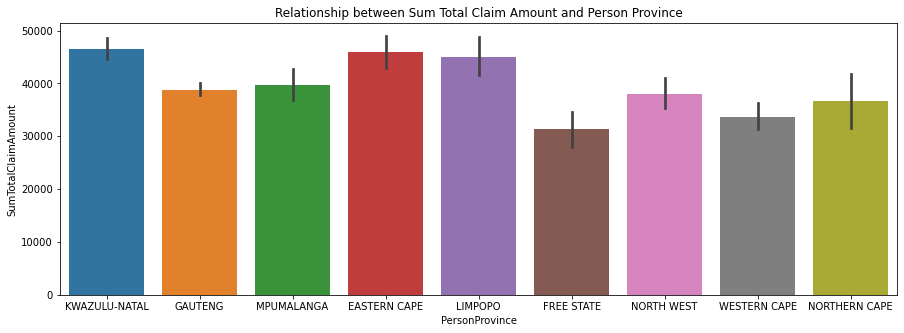

In [60]:
plt.figure(figsize=(15,5))
sns.barplot(x = "PersonProvince", y = "SumTotalClaimAmount", data = df)
plt.title('Relationship between Sum Total Claim Amount and Person Province');
plt.show();

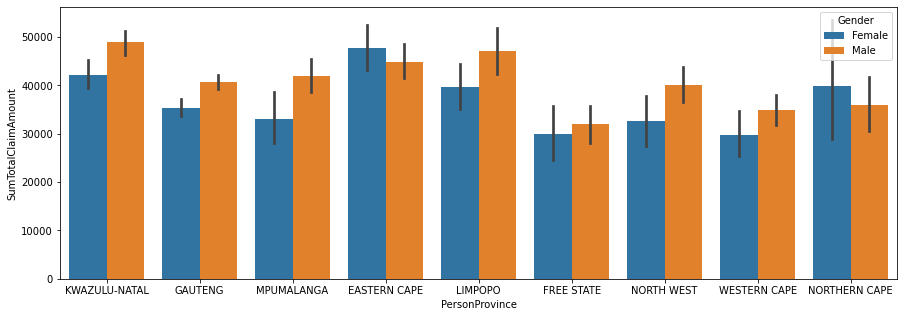

In [39]:
plt.figure(figsize=(15,5))
sns.barplot(x = "PersonProvince", y = "SumTotalClaimAmount", hue = "Gender", data = df);
plt.show();

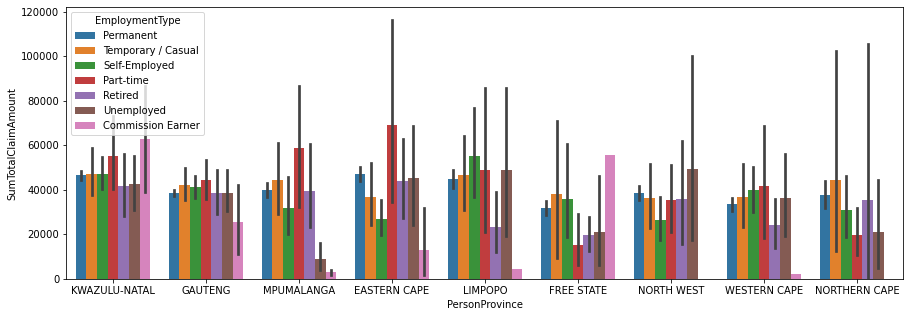

In [40]:
plt.figure(figsize=(15,5))
sns.barplot(x = "PersonProvince", y = "SumTotalClaimAmount", hue = "EmploymentType", data = df);
plt.show();

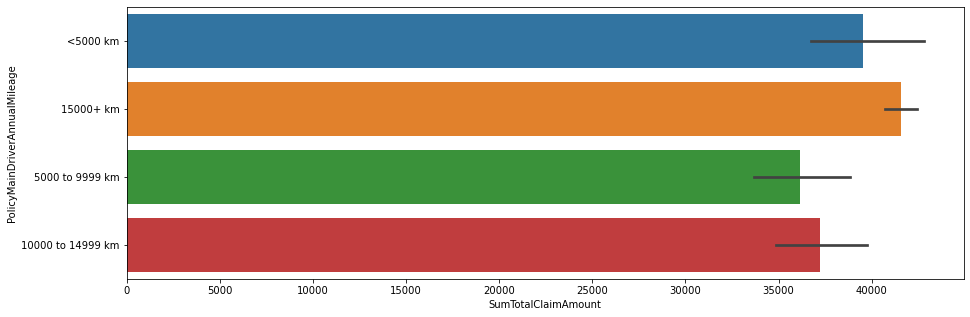

In [41]:
plt.figure(figsize=(15,5))
sns.barplot(x = "SumTotalClaimAmount", y = "PolicyMainDriverAnnualMileage", data = df);
plt.show();

<Figure size 1080x360 with 0 Axes>

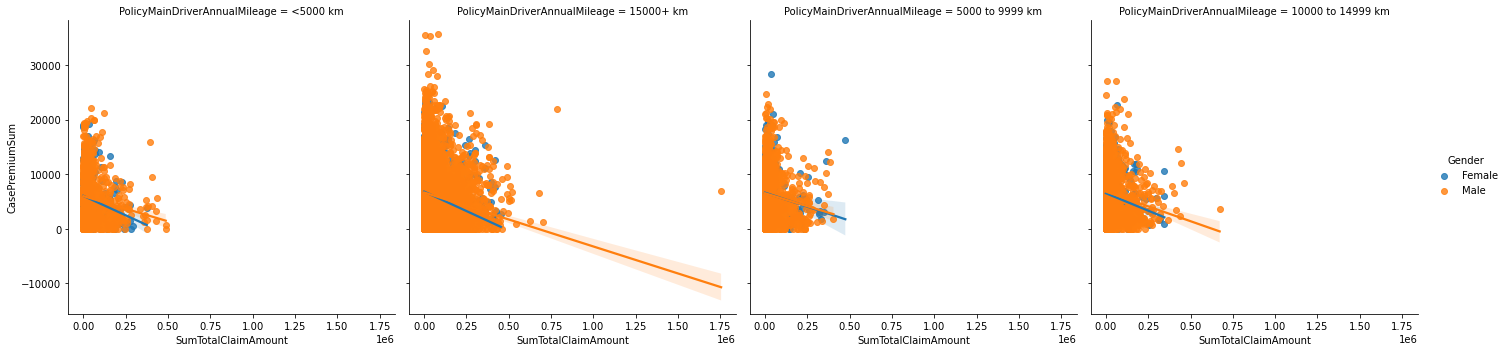

In [42]:
plt.figure(figsize=(15,5))
sns.lmplot(x = "SumTotalClaimAmount", y = "CasePremiumSum", hue = "Gender", col = "PolicyMainDriverAnnualMileage", data = df);
plt.show();

<Figure size 1080x360 with 0 Axes>

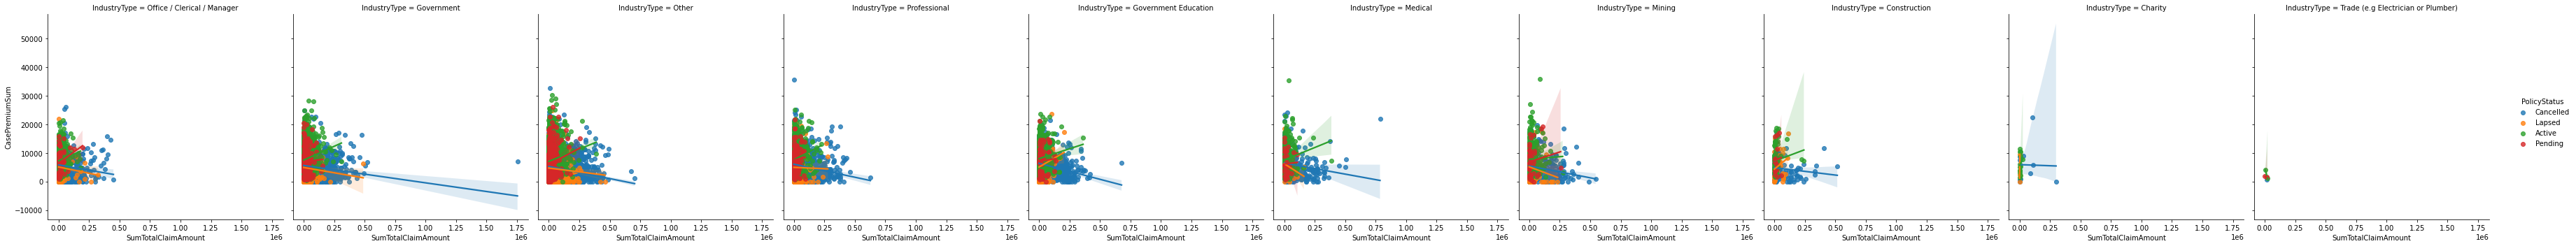

In [43]:
plt.figure(figsize=(15,5))
sns.lmplot(x = "SumTotalClaimAmount", y = "CasePremiumSum", hue = "PolicyStatus", col = "IndustryType", data = df);
plt.show();

<Figure size 1080x360 with 0 Axes>

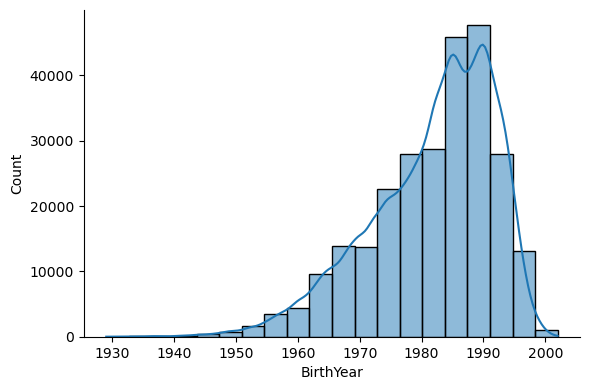

In [44]:
plt.figure(figsize=(15,5))
sns.displot(df["BirthYear"], bins = 20, kde = True, height=4, aspect=1.5).fig.set_dpi(100);

<Figure size 1080x360 with 0 Axes>

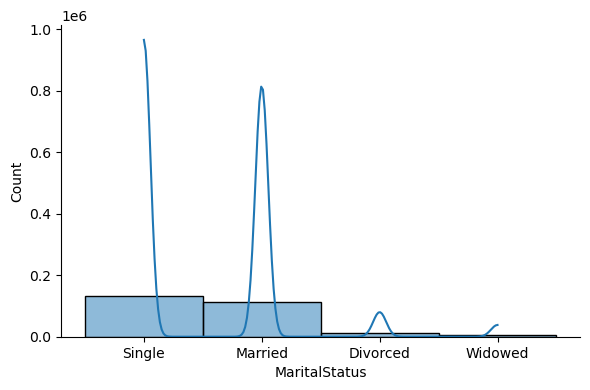

In [45]:
plt.figure(figsize=(15,5))
sns.displot(df["MaritalStatus"], bins = 20, kde = True, height=4, aspect=1.5).fig.set_dpi(100);

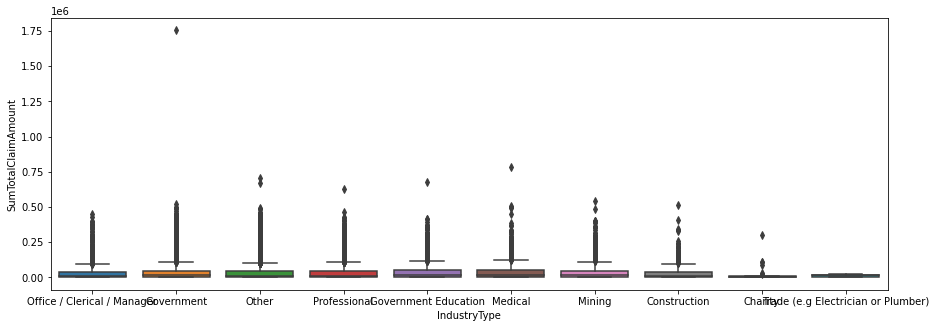

In [46]:
plt.figure(figsize=(15,5))
sns.boxplot(x = "IndustryType", y = "SumTotalClaimAmount", data = df);
plt.show();

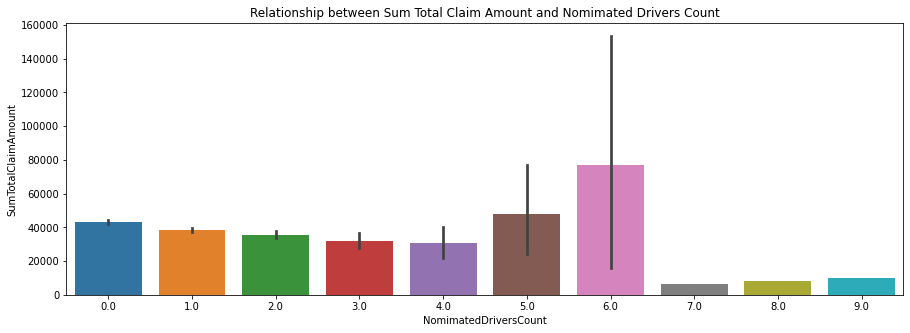

In [48]:
plt.figure(figsize=(15,5))
sns.barplot(x = "NomimatedDriversCount", y = "SumTotalClaimAmount", data = df)
plt.title('Relationship between Sum Total Claim Amount and Nomimated Drivers Count');
plt.show();

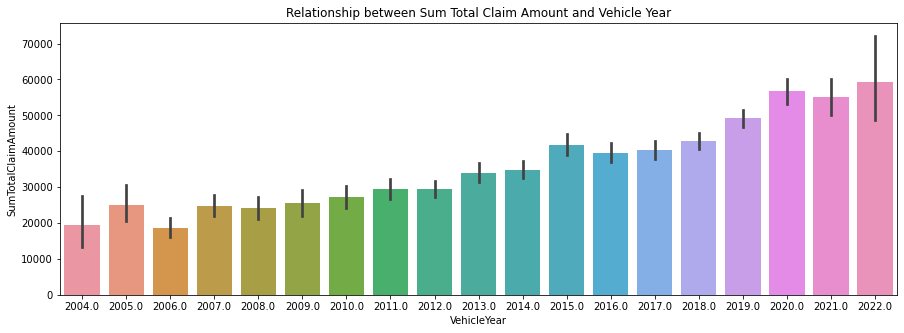

In [49]:
plt.figure(figsize=(15,5))
sns.barplot(x = "VehicleYear", y = "SumTotalClaimAmount", data = df)
plt.title('Relationship between Sum Total Claim Amount and Vehicle Year');
plt.show();

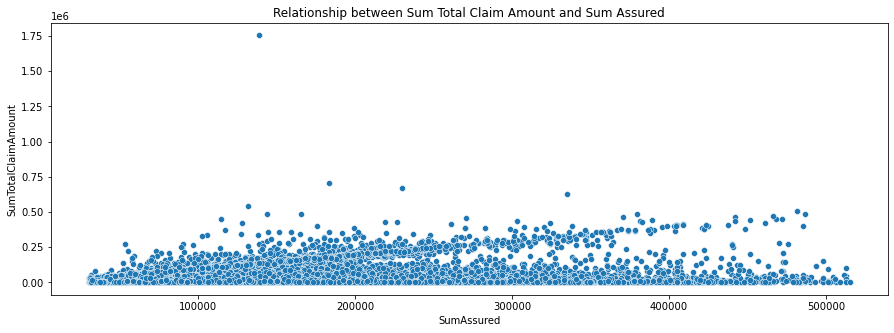

In [51]:
plt.figure(figsize=(15,5))
sns.scatterplot(x="SumAssured", y="SumTotalClaimAmount", data=df)
plt.title('Relationship between Sum Total Claim Amount and Sum Assured')
plt.show()

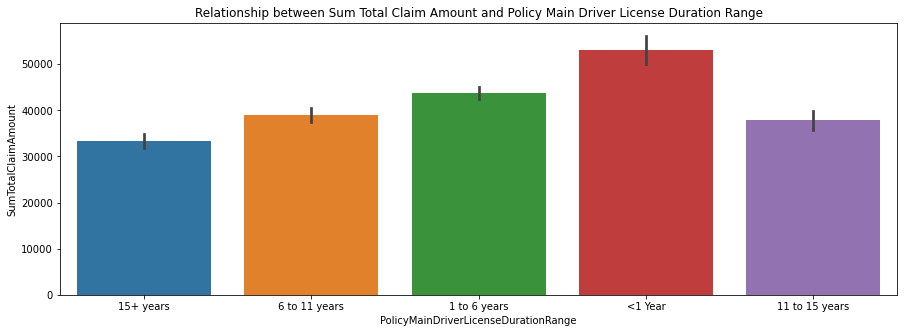

In [52]:
plt.figure(figsize=(15,5))
sns.barplot(x = "PolicyMainDriverLicenseDurationRange", y = "SumTotalClaimAmount", data = df)
plt.title('Relationship between Sum Total Claim Amount and Policy Main Driver License Duration Range');
plt.show();

([<matplotlib.patches.Wedge at 0x1fb64e7efd0>,
 [Text(-0.8645567098870804, 0.6801041798057315, 'M'),
  Text(0.8645566780491051, -0.6801042202785513, 'A')],
 [Text(-0.4715763872111347, 0.37096591625767167, '78.78%'),
  Text(0.47157636984496637, -0.37096593833375524, '21.22%')])

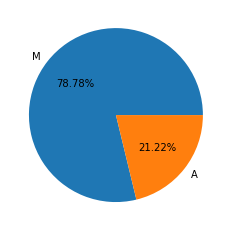

In [55]:
Transmissions =  df.Transmission.value_counts().index
Transmission_count = df.Transmission.value_counts().values

plt.pie(Transmission_count, labels=Transmissions, autopct="%1.2f%%")

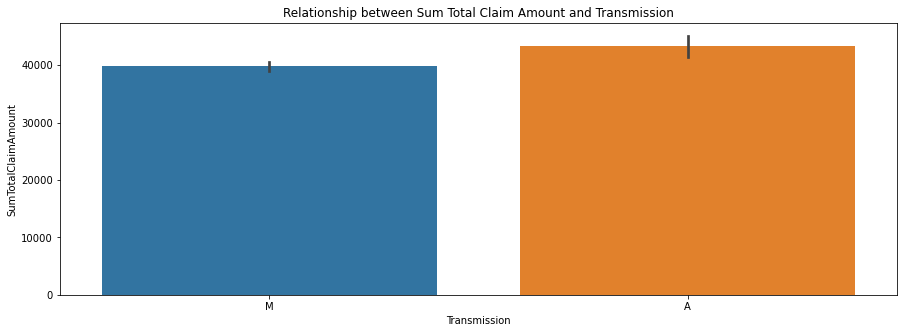

In [56]:
plt.figure(figsize=(15,5))
sns.barplot(x = "Transmission", y = "SumTotalClaimAmount", data = df)
plt.title('Relationship between Sum Total Claim Amount and Transmission');
plt.show();

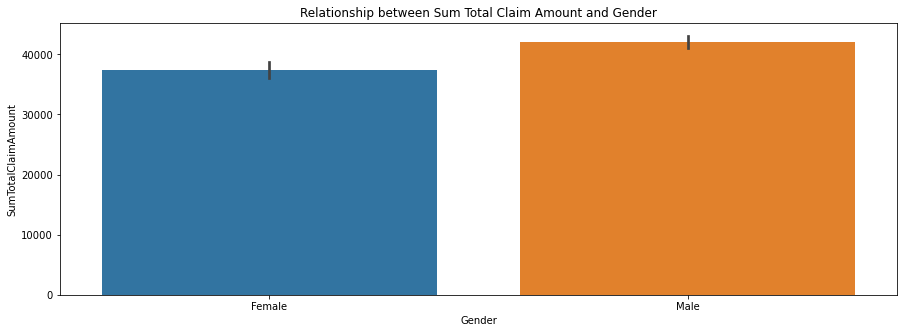

In [57]:
plt.figure(figsize=(15,5))
sns.barplot(x = "Gender", y = "SumTotalClaimAmount", data = df)
plt.title('Relationship between Sum Total Claim Amount and Gender');
plt.show();

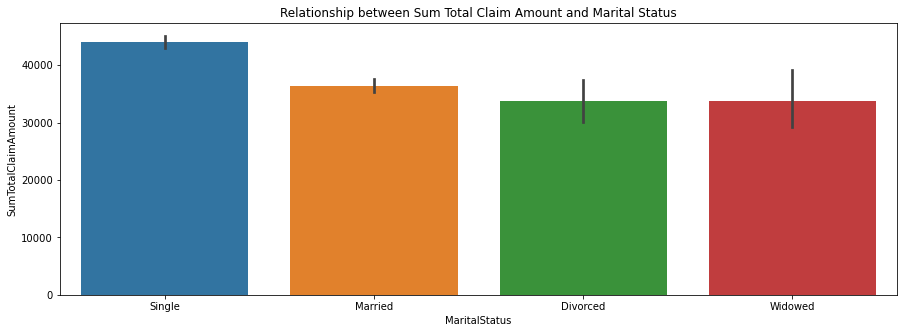

In [58]:
plt.figure(figsize=(15,5))
sns.barplot(x = "MaritalStatus", y = "SumTotalClaimAmount", data = df)
plt.title('Relationship between Sum Total Claim Amount and Marital Status');
plt.show();

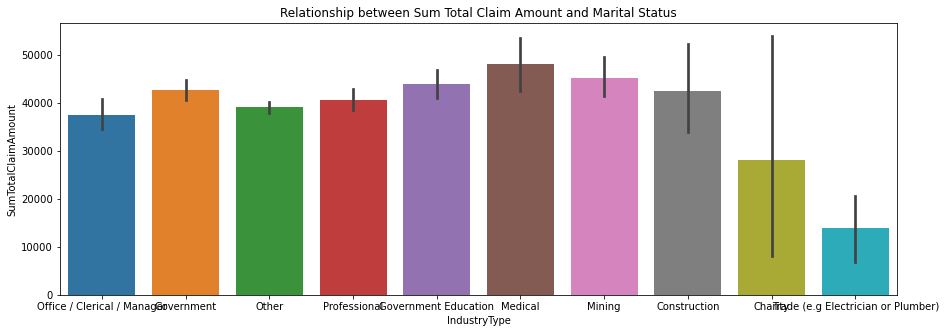

In [59]:
plt.figure(figsize=(15,5))
sns.barplot(x = "IndustryType", y = "SumTotalClaimAmount", data = df)
plt.title('Relationship between Sum Total Claim Amount and Marital Status');
plt.show();

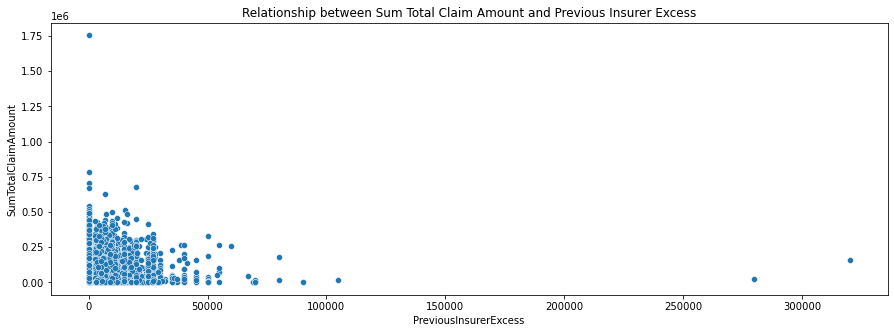

In [62]:
plt.figure(figsize=(15,5))
sns.scatterplot(x="PreviousInsurerExcess", y="SumTotalClaimAmount", data=df)
plt.title('Relationship between Sum Total Claim Amount and Previous Insurer Excess')
plt.show()

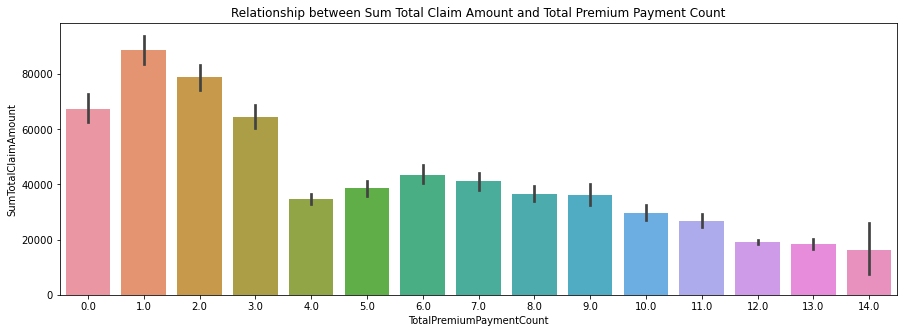

In [64]:
plt.figure(figsize=(15,5))
sns.barplot(x = "TotalPremiumPaymentCount", y = "SumTotalClaimAmount", data = df)
plt.title('Relationship between Sum Total Claim Amount and Total Premium Payment Count');
plt.show();

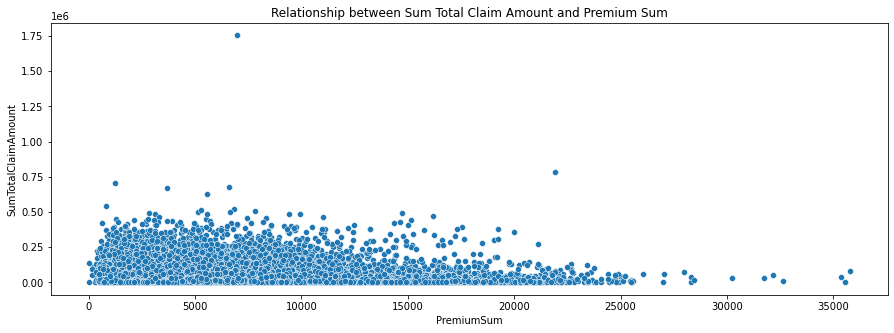

In [67]:
plt.figure(figsize=(15,5))
sns.scatterplot(x="PremiumSum", y="SumTotalClaimAmount", data=df)
plt.title('Relationship between Sum Total Claim Amount and Premium Sum')
plt.show()

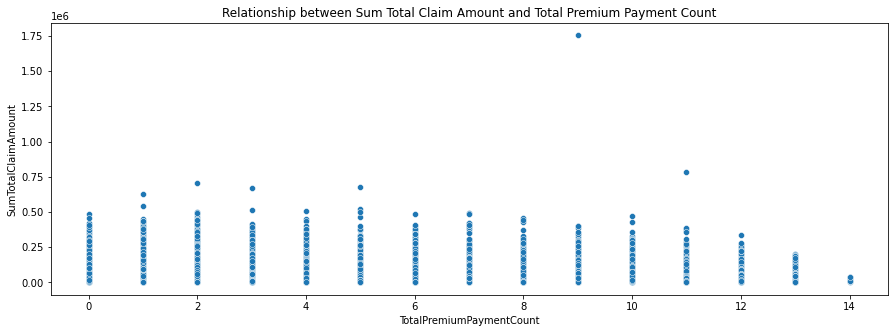

In [68]:
plt.figure(figsize=(15,5))
sns.barplot(x = "TotalPremiumPaymentCount", y = "SumTotalClaimAmount", data = df)
plt.title('Relationship between Sum Total Claim Amount and Total Premium Payment Count');
plt.show();


plt.figure(figsize=(15,5))
sns.scatterplot(x="TotalPremiumPaymentCount", y="SumTotalClaimAmount", data=df)
plt.title('Relationship between Sum Total Claim Amount and Total Premium Payment Count')
plt.show()